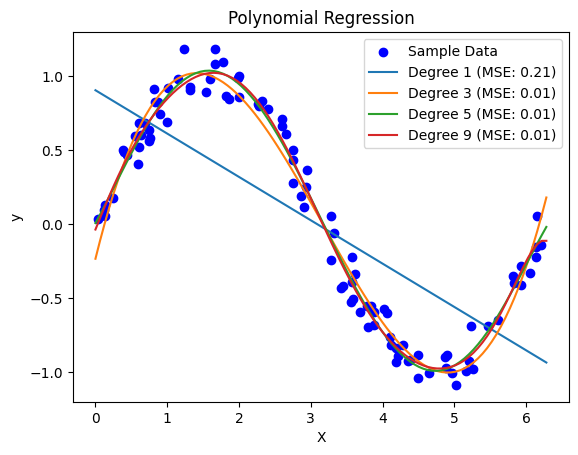

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some sample data
np.random.seed(0)
X = 2 * np.pi * np.random.rand(100, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)

# Plot the sample data
plt.scatter(X, y, color='blue', label='Sample Data')

# Fit polynomial regression models of different degrees
degrees = [1, 3, 5, 9]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    y_pred = lin_reg.predict(X_poly)
    
    # Calculate mean squared error
    mse = mean_squared_error(y, y_pred)
    
    # Plot the polynomial regression curve
    X_plot = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = lin_reg.predict(X_plot_poly)
    plt.plot(X_plot, y_plot, label=f'Degree {degree} (MSE: {mse:.2f})')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


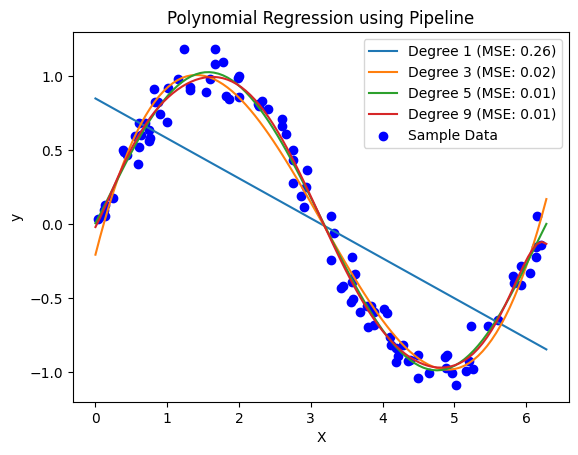

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate some sample data
np.random.seed(0)
X = 2 * np.pi * np.random.rand(100, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('lin_reg', LinearRegression())
])

# Fit the pipeline on the training data
degrees = [1, 3, 5, 9]
for degree in degrees:
    pipeline.set_params(poly_features__degree=degree)
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = pipeline.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Plot the polynomial regression curve
    X_plot = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
    y_plot = pipeline.predict(X_plot)
    plt.plot(X_plot, y_plot, label=f'Degree {degree} (MSE: {mse:.2f})')

# Plot the sample data
plt.scatter(X, y, color='blue', label='Sample Data')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression using Pipeline')
plt.legend()
plt.show()
